<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/mushrooms.csv')

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.shape

(8124, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
x=data.drop('class',axis=1)
y=data['class']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_balanced,y_balanced = undersampler.fit_resample(x, y)


In [ ]:
y_balanced.value_counts()

e    3916
p    3916
Name: class, dtype: int64

In [ ]:
X_balanced.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,y,e,t,n,f,c,b,u,t,...,s,p,p,p,w,o,p,n,v,d
1,f,y,r,f,n,f,c,n,h,e,...,f,w,w,p,w,o,f,h,v,d
2,x,y,e,t,n,f,c,b,u,t,...,s,g,p,p,w,o,p,k,y,d
3,f,s,n,f,n,a,c,b,o,e,...,s,o,o,p,n,o,p,b,c,l
4,b,f,w,f,n,f,w,b,g,e,...,s,w,w,p,w,t,p,w,s,g


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


# Function to apply LabelEncoder to categorical columns
def label_encode_categorical_columns(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    return df

# Apply LabelEncoder to all categorical columns
x_encoded = label_encode_categorical_columns(X_balanced)

print(x_encoded)

y_balanced=encoder.fit_transform(y_balanced)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            3          2        1     5                1   
1             2            3          6        0     5                1   
2             5            3          2        1     5                1   
3             2            2          4        0     5                0   
4             0            0          8        0     5                1   
...         ...          ...        ...      ...   ...              ...   
7827          2            3          1        0     4                0   
7828          3            3          4        0     7                1   
7829          3            2          2        0     8                1   
7830          3            3          4        0     2                1   
7831          3            3          4        0     8                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          0       

In [ ]:
x_encoded=pd.DataFrame(x_encoded,columns=X_balanced.columns)

In [ ]:
x_encoded.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,3,2,1,5,1,0,0,9,1,...,2,6,6,0,2,1,4,3,4,0
1,2,3,6,0,5,1,0,1,3,0,...,0,7,7,0,2,1,1,1,4,0
2,5,3,2,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,2,5,0
3,2,2,4,0,5,0,0,0,6,0,...,2,5,5,0,0,1,4,0,1,2
4,0,0,8,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [ ]:
y_encoded=y_balanced

In [ ]:
y_encoded=pd.DataFrame(y_encoded)

In [ ]:
data=pd.concat([x_encoded,y_encoded],axis=1)

In [ ]:
data.sample(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,0
2811,5,3,2,1,5,1,0,0,5,1,...,3,6,0,2,1,4,3,4,0,0
3594,5,3,2,1,5,1,0,0,10,0,...,7,7,0,2,2,0,7,1,6,0
5447,2,0,3,0,2,1,0,0,7,0,...,6,6,0,2,1,2,1,5,0,1


<Axes: >

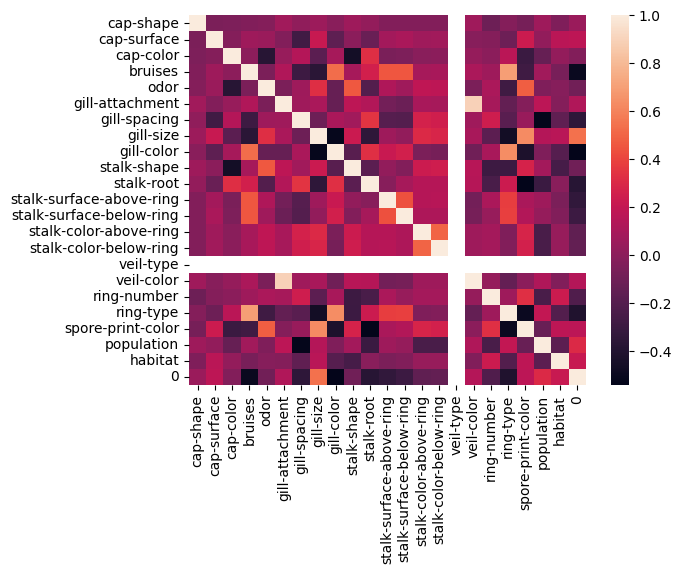

In [ ]:
sns.heatmap(data.corr())

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y_encoded,stratify=y_encoded,random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)
y_hat=rf.predict(x_test)

<ipython-input-42-25830e87ee35>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report=classification_report(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       979

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



In [46]:
print(cm)

[[979   0]
 [  0 979]]


<Axes: >

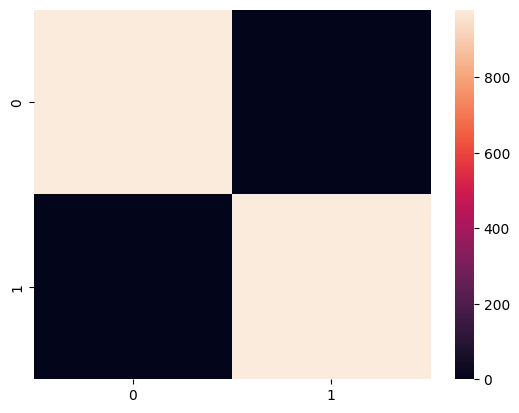

In [50]:
sns.heatmap(cm)

In [51]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
1.0


<ipython-input-53-b6d033979cd3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_hat,hist=False,color='r',label='predicted')
<ipython-input-53-b6d033979cd3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,color='b',label='actual',ax=ax1)


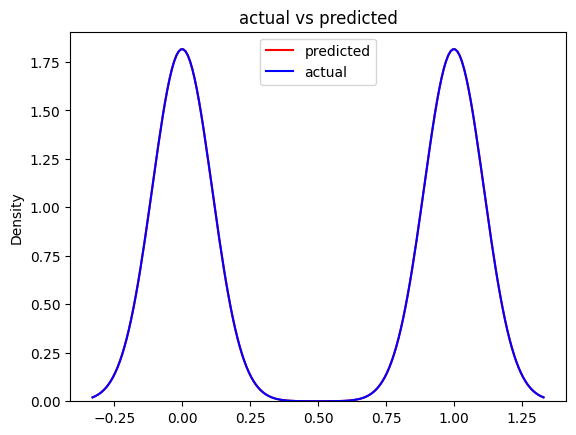

In [53]:
ax1=sns.distplot(y_hat,hist=False,color='r',label='predicted')
sns.distplot(y_test,hist=False,color='b',label='actual',ax=ax1)


plt.title('actual vs predicted')
plt.legend()
plt.show()
